In [1]:
from pynq.overlays.base import BaseOverlay
import time
from datetime import datetime
base = BaseOverlay("base.bit")

In [2]:
%%microblaze base.PMODA

#include "gpio.h"
#include "pyprintf.h"

//Function to turn on/off a selected pin of PMODA
unsigned int write_gpio(unsigned int pin, unsigned int val){
    if (pin > 3 || pin < 1)
    {
        pyprintf("ERROR: invalid pin");
        return 0;
    }
    if (val > 1)
    {
        pyprintf("ERROR: invalid value");
    }
    gpio pin_out = gpio_open(pin);
    gpio_set_direction(pin_out, GPIO_OUT);
    gpio_write(pin_out, val);
    return 0;
}

//Function to read the value of a selected pin of PMODA
unsigned int read_gpio(unsigned int pin){
    gpio pin_in = gpio_open(pin);
    gpio_set_direction(pin_in, GPIO_IN);
    return gpio_read(pin_in);
}

//Function to reset all GPIO on PMODA
unsigned int reset_all_gpio()
{
    for (unsigned int i=0; i <= 7; i++)
    {
        gpio temp_gpio = gpio_open(i);
        gpio_close(temp_gpio);
    }
    return 0;
}

In [17]:
def inverse_array(arr):
    return [1 - x for x in arr]

In [53]:
from pynq.lib import Pmod_PWM

data=[]
pwm = Pmod_PWM(base.PMODB,1)
inputData = [1,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,1,0,1,1,1]

timeBefore = time.time() 
for i in range(len(inputData)):
    if inputData[i] ==1:
        pwm.generate(26,50)
    else:
        pwm.stop()
    data.append(read_gpio(1))
    
timeAfter = time.time() 
print('time spent: {}'.format(timeAfter-timeBefore)) 
    
pwm.stop()

time spent: 0.04085230827331543


[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1]


[1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1]


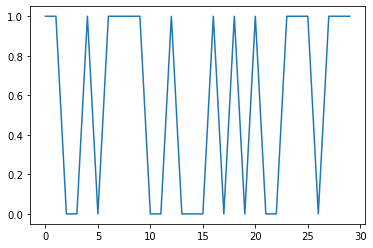

In [52]:
import matplotlib.pyplot as plt

plt.plot(inverse_array(data))
print(inputData)
print('\n')
print(inverse_array(data))

In [ ]:
for i in range(20):
    pwm.generate(26,50)
    time.sleep(0.01)
    data.append(read_gpio(1))
    time.sleep(0.01)
    pwm.stop()
    time.sleep(0.01)
    data.append(read_gpio(1))

pwm.generate(26,50)
for i in range(20):
    data.append(read_gpio(1))
    time.sleep(0.01)
    
pwm.stop()    
for i in range(20):
    data.append(read_gpio(1))
    time.sleep(0.01)

pwm.stop()